In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(iris.target_names)
print(df.head())

['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


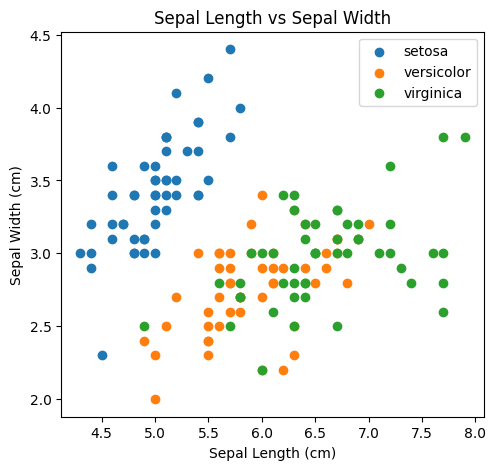

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(df[df['target'] == i]['sepal length (cm)'], 
                df[df['target'] == i]['sepal width (cm)'], 
                label=iris.target_names[i])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

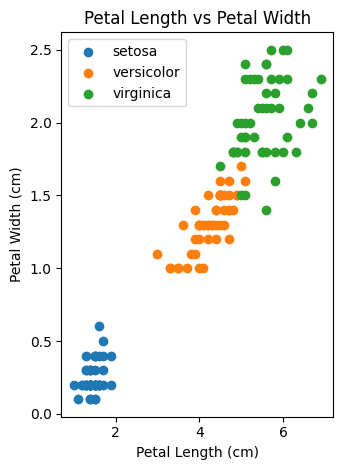

In [5]:
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(df[df['target'] == i]['petal length (cm)'], 
                df[df['target'] == i]['petal width (cm)'], 
                label=iris.target_names[i])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

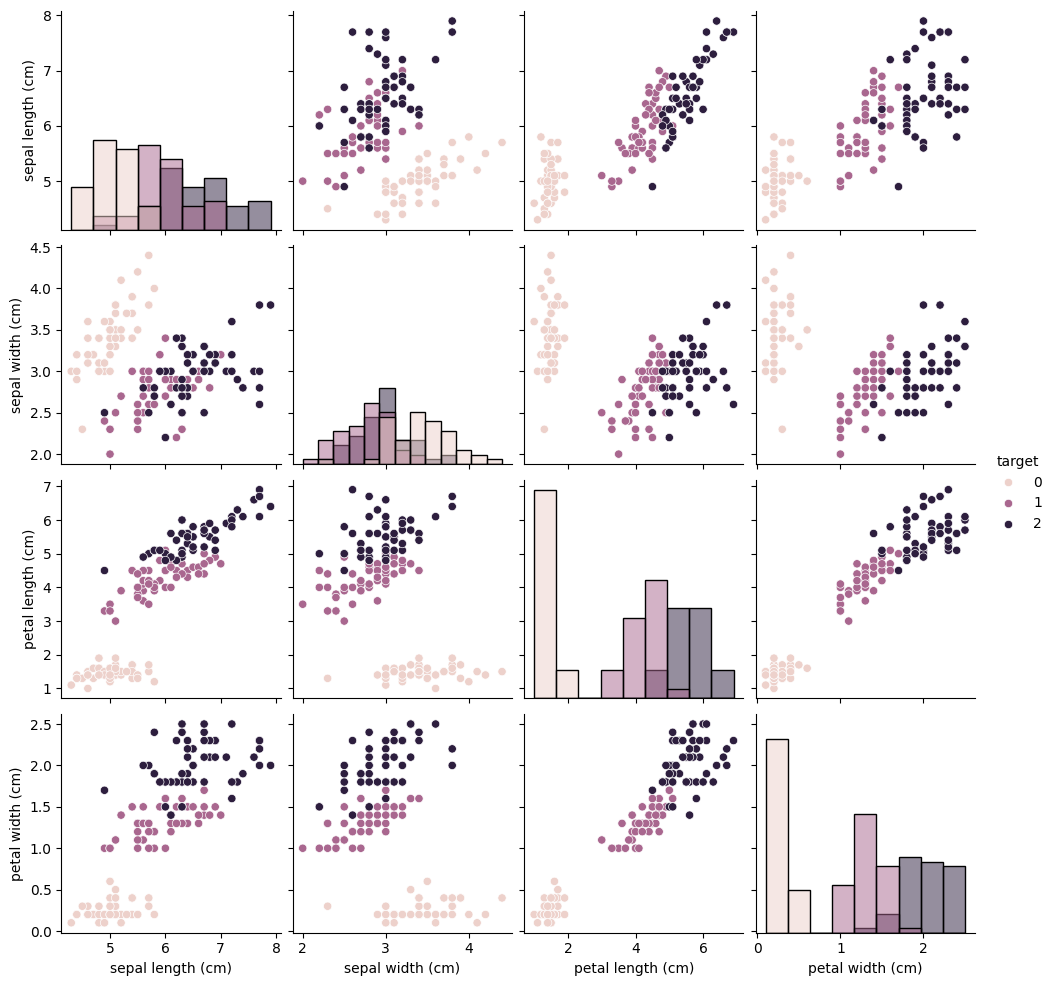

In [6]:
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

In [7]:
df_setosa_versicolor = df[df['target'].isin([0, 1])].copy()
df_versicolor_virginica = df[df['target'].isin([1, 2])].copy()
(len(df_setosa_versicolor),  len(df_versicolor_virginica))

(100, 100)

In [8]:
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [9]:
X1 = df_setosa_versicolor.drop('target', axis=1)
y1 = df_setosa_versicolor['target']
accuracy1 = train_and_evaluate(X1, y1)
print(f"\nТочность модели для setosa vs versicolor: {accuracy1:.3f}")


Точность модели для setosa vs versicolor: 1.000


In [10]:
X2 = df_versicolor_virginica.drop('target', axis=1)
y2 = df_versicolor_virginica['target']
accuracy2 = train_and_evaluate(X2, y2)
print(f"Точность модели для versicolor vs virginica: {accuracy2:.3f}")

Точность модели для versicolor vs virginica: 0.950


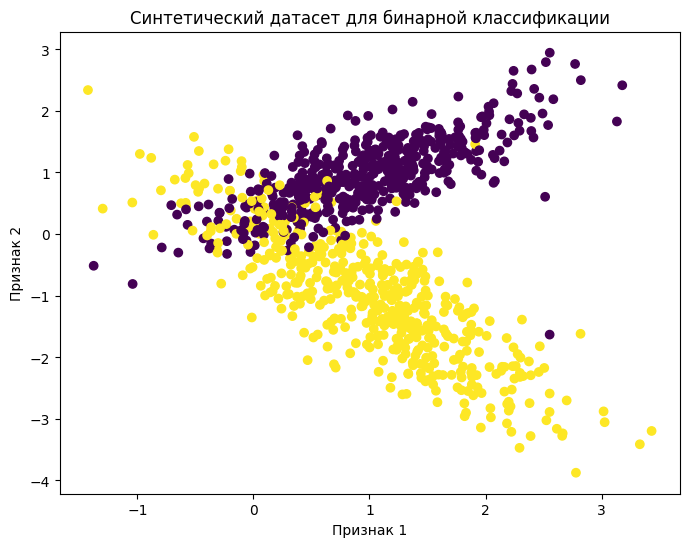

In [11]:
X_synth, y_synth = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                     n_informative=2, random_state=1, n_clusters_per_class=1)

plt.figure(figsize=(8, 6))
plt.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Синтетический датасет для бинарной классификации')
plt.show()

In [13]:
accuracy_synth = train_and_evaluate(X_synth, y_synth)
print(f"Точность модели на синтетическом датасете: {accuracy_synth:.3f}")

Точность модели на синтетическом датасете: 0.935
